In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_json("TeslaStocksET.json")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            2516 non-null   datetime64[ns]
 1   open            2516 non-null   float64       
 2   high            2516 non-null   float64       
 3   low             2516 non-null   float64       
 4   close           2516 non-null   float64       
 5   volume          2516 non-null   int64         
 6   rsi_7           2516 non-null   float64       
 7   rsi_14          2516 non-null   float64       
 8   cci_7           2516 non-null   float64       
 9   cci_14          2516 non-null   float64       
 10  sma_50          2516 non-null   float64       
 11  ema_50          2516 non-null   float64       
 12  sma_100         2516 non-null   float64       
 13  ema_100         2516 non-null   float64       
 14  macd            2516 non-null   float64       
 15  boll

In [2]:
df.head()

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
0,2014-01-02,9.986667,10.165333,9.770000,10.006667,92826000,55.344071,54.440118,-37.373644,15.213422,9.682107,9.820167,10.494240,9.674284,0.169472,9.740800,0.395333,0.402641,0.447550,9.970667
1,2014-01-03,10.000000,10.146000,9.906667,9.970667,70425000,53.742629,53.821521,-81.304471,17.481130,9.652800,9.826069,10.495693,9.680190,0.162623,9.776167,0.239333,0.379311,0.432677,9.800000
2,2014-01-06,10.000000,10.026667,9.682667,9.800000,80416500,46.328174,50.870410,-123.427544,-37.824708,9.629467,9.825047,10.496740,9.682577,0.141790,9.797900,0.344000,0.374267,0.426343,9.957333
3,2014-01-07,9.841333,10.026667,9.683333,9.957333,75511500,53.263037,53.406750,-84.784651,-20.779431,9.597747,9.830235,10.503407,9.688051,0.136402,9.837900,0.343334,0.369848,0.420414,10.085333
4,2014-01-08,9.923333,10.246667,9.917333,10.085333,92448000,58.368660,55.423026,60.799662,43.570559,9.573240,9.840239,10.511147,9.695964,0.140837,9.870167,0.329334,0.364060,0.413908,9.835333


In [3]:
def calc_corr(df, col1, col2):
    print(col1, "vs", col2, ":")
    correlation_with_outliers = df [col1].corr(df[col2])
    print("Correlation w/ Outliers: ", correlation_with_outliers)
    
    Q1=df[[col1, col2]].quantile(0.25)
    Q3=df[[col1, col2]].quantile(0.75)
    IQR=Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    
    df_no_outliers = df.copy()

    idx = 0
    for idx in range(len(df_no_outliers)):
        value1 = df_no_outliers.loc[idx][col1]
        value2 = df_no_outliers.loc[idx][col2]
        if value1 > upper_bound [col1] or value1 < lower_bound[col1]:
            df_no_outliers.drop([idx], inplace=True)
        if value2 > upper_bound [col2] or value2 < lower_bound[col2]:
            df_no_outliers.drop([idx], inplace=True)
            
    correlation_without_outliers = df_no_outliers[col1].corr(df_no_outliers [col2])
    print("Correlation w/o Outliers: ", correlation_without_outliers)

calc_corr(df, 'open', 'volume')

open vs volume :
Correlation w/ Outliers:  -0.048496276906608654
Correlation w/o Outliers:  0.045578212591383414


<Axes: xlabel='high', ylabel='volume'>

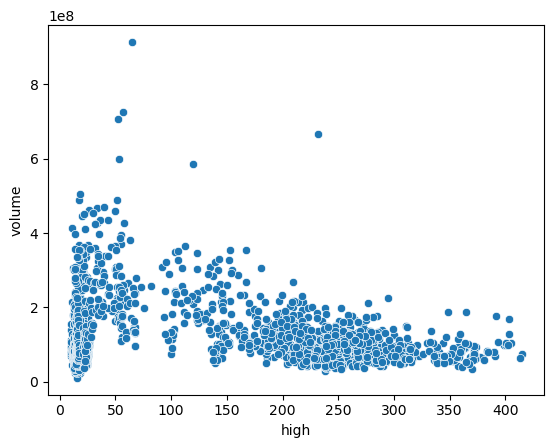

In [4]:
sns.scatterplot(data=df,x="high", y="volume")

In [5]:
log_High=np.log(df["high"])

In [6]:
df["Log High"]=log_High

In [7]:
df.head()

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,...,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close,Log High
0,2014-01-02,9.986667,10.165333,9.770000,10.006667,92826000,55.344071,54.440118,-37.373644,15.213422,...,9.820167,10.494240,9.674284,0.169472,9.740800,0.395333,0.402641,0.447550,9.970667,2.318983
1,2014-01-03,10.000000,10.146000,9.906667,9.970667,70425000,53.742629,53.821521,-81.304471,17.481130,...,9.826069,10.495693,9.680190,0.162623,9.776167,0.239333,0.379311,0.432677,9.800000,2.317080
2,2014-01-06,10.000000,10.026667,9.682667,9.800000,80416500,46.328174,50.870410,-123.427544,-37.824708,...,9.825047,10.496740,9.682577,0.141790,9.797900,0.344000,0.374267,0.426343,9.957333,2.305248
3,2014-01-07,9.841333,10.026667,9.683333,9.957333,75511500,53.263037,53.406750,-84.784651,-20.779431,...,9.830235,10.503407,9.688051,0.136402,9.837900,0.343334,0.369848,0.420414,10.085333,2.305248
4,2014-01-08,9.923333,10.246667,9.917333,10.085333,92448000,58.368660,55.423026,60.799662,43.570559,...,9.840239,10.511147,9.695964,0.140837,9.870167,0.329334,0.364060,0.413908,9.835333,2.326952


<Axes: xlabel='high', ylabel='volume'>

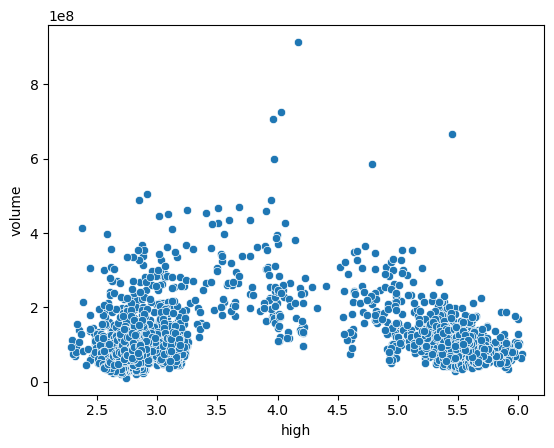

In [8]:
sns.scatterplot(data=df,x=log_High, y="volume")

In [9]:
df["high"].corr(df["volume"])

-0.04379362079085313

In [10]:
def corrcalc(df, x, y, num_outliers):
    if num_outliers >0:
        for count in range(num_outliers):
            idx=df[df[x]==df[x].max()].index
            for i in idx:
                df.drop([i], inplace=True)
            idx=df[df[y]==df[y].max()].index
            for i in idx:
                df.drop([i], inplace=True)
    sub_df=df[[x,y]]
    return sub_df.corr(method='pearson')

corrcalc(df, 'high', 'volume', 0)

,high,volume
high,1.000000,-0.043794
volume,-0.043794,1.000000


In [11]:
'''
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[
    ~((df < lower_bound) | (df > upper_bound)).any(axis=1)
]

sns.scatterplot(data=df_no_outliers, x=log_High, y='volume')
'''

"\nQ1 = df.quantile(0.25)\nQ3 = df.quantile(0.75)\nIQR = Q3 - Q1\n\nlower_bound = Q1 - 1.5 * IQR\nupper_bound = Q3 + 1.5 * IQR\n\ndf_no_outliers = df[\n    ~((df < lower_bound) | (df > upper_bound)).any(axis=1)\n]\n\nsns.scatterplot(data=df_no_outliers, x=log_High, y='volume')\n"

In [33]:
import requests
from datetime import datetime, timedelta
import time

def gather_data(start, end):
    data={
        "Date": [], "Open": [], "High": [], "Low": [], "Close": [], "Volume": []
    }
    
    current_date=pd.to_datetime(start)
    end_date=pd.to_datetime(end)

    while current_date<=end_date:
        date_str=current_date.strftime('%Y-%m-%d')
        url=f'https://api.polygon.io/v1/open-close/TSLA/{date_str}?adjusted=false&apiKey=ddpWc5RD_xHs1qDtuTRHI9iDMGz_EleI'

        response=requests.get(url)
        if response.status_code==200:
            json_data=response.json()
            data["Date"].append(current_date)
            data["Open"].append(json_data['open'])
            data["High"].append(json_data['high'])
            data["Low"].append(json_data['low'])
            data["Close"].append(json_data['close'])
            data["Volume"].append(json_data['volume'])
        else:
            print("Bad request")

        current_date+=timedelta(days=1)

        time.sleep(60)

        current_date+=timedelta(days=1)

    return pd.DataFrame(data)

gather_data('2024-09-25', '2024-09-25')

,Date,Open,High,Low,Close,Volume
0,2024-09-25,252.54,257.05,252.28,257.02,64864664.0


In [13]:
em = pd.read_json("Elongated_Muskrat.json")
em.head()

,Date,Tweet Count
0,2023-03-18,77
1,2023-05-07,76
2,2022-12-16,75
3,2022-11-23,69
4,2023-03-27,66


In [35]:
ct=pd.read_json("tsla.json")
ct.head()

,Date,open,high,low,close,volume
0,2014-01-02,9.986667,10.165333,9.770000,10.006667,92826000
1,2014-01-03,10.000000,10.146000,9.906667,9.970667,70425000
2,2014-01-06,10.000000,10.026667,9.682667,9.800000,80416500
3,2014-01-07,9.841333,10.026667,9.683333,9.957333,75511500
4,2014-01-08,9.923333,10.246667,9.917333,10.085333,92448000


In [49]:
def combine_datasets(df1, df2, shared_column):
    merged_df=pd.merge(df1, df2, on=shared_column, how='inner')
    return merged_df

combine_datasets(ct, em, 'Date')

,Date,open,high,low,close,volume,Tweet Count
0,2014-01-06,10.000000,10.026667,9.682667,9.800000,80416500,2
1,2014-01-07,9.841333,10.026667,9.683333,9.957333,75511500,1
2,2014-01-23,11.815333,12.158667,11.561333,12.100000,118011000,1
3,2014-01-30,11.866667,12.318667,11.800667,12.189333,128475000,1
4,2014-02-07,12.067333,12.442000,11.973333,12.435333,133927500,1
...,...,...,...,...,...,...,...
1730,2023-06-23,259.290009,262.450012,252.800003,256.600006,176584100,12
1731,2023-06-26,250.070007,258.369995,240.699997,241.050003,179990600,25
1732,2023-06-27,243.240005,250.389999,240.850006,250.210007,164968200,30
1733,2023-06-28,249.699997,259.880005,248.889999,256.239990,159770800,11


<Axes: xlabel='Date', ylabel='high'>

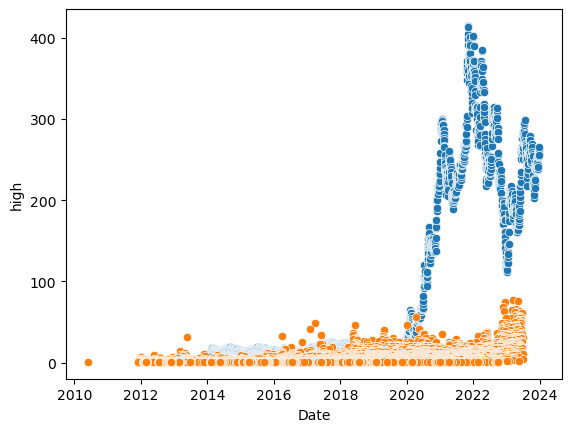

In [57]:
sns.scatterplot(data=ct, x="Date", y="high")
sns.scatterplot(data=em, x="Date", y="Tweet Count")

In [66]:
TSLA=pd.merge(ct, em, on='Date', how='inner')
correlation_coefficient = TSLA.corr()
correlation_coefficient

,Date,open,high,low,close,volume,Tweet Count
Date,1.000000,0.777549,0.778263,0.777475,0.777991,0.124155,0.502927
open,0.777549,1.000000,0.999636,0.999466,0.998916,-0.156170,0.289558
high,0.778263,0.999636,1.000000,0.999489,0.999502,-0.150636,0.289946
low,0.777475,0.999466,0.999489,1.000000,0.999584,-0.161168,0.288108
close,0.777991,0.998916,0.999502,0.999584,1.000000,-0.155149,0.288308
volume,0.124155,-0.156170,-0.150636,-0.161168,-0.155149,1.000000,0.128422
Tweet Count,0.502927,0.289558,0.289946,0.288108,0.288308,0.128422,1.000000
